In [8]:
import numpy as np
np.random.seed(88889999)
import graspy
from graspy.inference import SemiparametricTest
from graspy.embed import AdjacencySpectralEmbed
from graspy.simulations import sbm, rdpg
from graspy.utils import symmetrize
from graspy.plot import heatmap, pairplot

%matplotlib inline

In [9]:
from tqdm import tqdm
def get_power(n=50, iters=100):
    ns = [n, n]
    p1 = np.array([[.9,.1],[.1,.9]])
    p2 = np.array([[.9,.1],[.1,.9]]) #or .4 on off-diagonals for power -> 1
    A1 = sbm(ns,p1)
    A2 = sbm(ns,p2)
    X1 = AdjacencySpectralEmbed().fit_transform(A1)
    X2 = AdjacencySpectralEmbed().fit_transform(A2)
    A1 = rdpg(X1,
          loops=False,
          rescale=False,
          directed=False)
    A2 = rdpg(X2,
          loops=False,
          rescale=False,
          directed=False)
    npt = graspy.inference.NonparametricTest()
    p = npt.fit(A1, A2)
    sorted_ = np.sort(npt.null_distribution_)
    rej_ind = int(np.ceil(((1 - 0.05)*200))) #200 is n_bootstraps, 0.05 is alpha
    critical_value = sorted_[rej_ind]
    rejections = 0
    for i in range(iters):
        A = sbm(ns,p1)
        B = sbm(ns,p2)
        npt_2 = graspy.inference.NonparametricTest(n_bootstraps=1)
        npt_2.fit(A,B)
        U = npt_2.sample_T_statistic_
        if U > critical_value:
            rejections += 1
    return rejections/iters

In [10]:
pows = []
x = range(10,101,5)
allx = []
for n in tqdm(x):
    xs = []
    for _ in range(10):
        xs.append(get_power(n))
    allx.append(xs)
    pows.append(np.mean(xs))

100%|██████████| 19/19 [39:04<00:00, 248.62s/it]


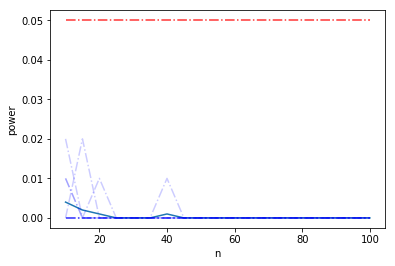

In [13]:
import matplotlib.pyplot as plt
plt.plot(x,pows)
for i in range(10):
    plt.plot(x, np.array(allx)[:,i], 'b-.', alpha=0.2)
plt.plot(x,[0.05]*len(x),'r-.',alpha=0.8)
plt.xlabel('n')
plt.ylabel('power')
plt.savefig('power_curve.png')
plt.show()

In [14]:
import mgcpy

ModuleNotFoundError: No module named 'mgcpy'